In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(X_train,Y_train),(X_test,Y_test)=tf.keras.datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [14]:
Y_train=Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes=["airplane","automobile","bird","cat","deer",
         "dog","frog","horse","ship","truck"]


In [15]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

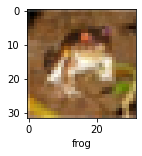

In [17]:
plot_sample(X_train,Y_train,0)

In [19]:
#normalizing pixels by dividing with 255
X_train = X_train/255
X_test=X_test/255

In [27]:
cnn=tf.keras.models.Sequential([
    #CNN-1
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),
                           activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    #CNN-2
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    #dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])


In [28]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 5ms/step - loss: 1.4545 - accuracy: 0.4755
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1202 - accuracy: 0.6076
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9863 - accuracy: 0.6567
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8965 - accuracy: 0.6860
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8302 - accuracy: 0.7125
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7746 - accuracy: 0.7312
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7245 - accuracy: 0.7502
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6818 - accuracy: 0.7645
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6436 - accuracy: 0.7766
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.61

In [29]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9321 - accuracy: 0.6910


[0.9320673942565918, 0.6909999847412109]

In [32]:
Y_test=Y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

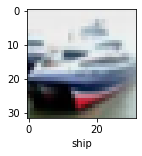

In [33]:
plot_sample(X_test,Y_test,1)

In [34]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[2.2860486e-03, 5.1009679e-06, 1.0750031e-03, 8.8821030e-01,
        1.1502830e-03, 7.1591869e-02, 1.3131192e-02, 3.8733505e-04,
        2.1827945e-02, 3.3485109e-04],
       [8.3002010e-03, 1.8129860e-01, 1.4349108e-06, 5.1623915e-06,
        1.8715746e-06, 1.3386648e-07, 5.5600000e-09, 1.3187236e-08,
        8.0901247e-01, 1.3800629e-03],
       [8.4738389e-02, 1.3996355e-01, 1.1881889e-03, 5.6492095e-03,
        1.7738974e-02, 6.1704632e-04, 3.3136195e-05, 5.7187281e-03,
        7.2920191e-01, 1.5150875e-02],
       [9.6898359e-01, 2.5258397e-03, 1.0210938e-02, 1.3477249e-04,
        1.3832687e-02, 2.2720549e-05, 2.5416059e-06, 3.0300682e-04,
        3.9573452e-03, 2.6675320e-05],
       [4.6424637e-05, 4.7019453e-04, 2.2591883e-02, 2.9767970e-02,
        2.9060668e-01, 2.1636921e-03, 6.5397972e-01, 1.0618621e-04,
        1.1702359e-04, 1.5022974e-04]], dtype=float32)

In [35]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [37]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

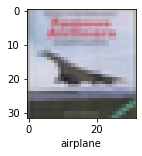

In [44]:
plot_sample(X_test,Y_test,3)

In [45]:
classes[y_classes[3]]

'airplane'

In [46]:
from sklearn.metrics import classification_report
print("classification report:\n",classification_report(Y_test,y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.76      0.86      0.81      1000
           2       0.54      0.62      0.57      1000
           3       0.53      0.46      0.49      1000
           4       0.66      0.61      0.63      1000
           5       0.65      0.56      0.60      1000
           6       0.71      0.78      0.75      1000
           7       0.76      0.73      0.74      1000
           8       0.82      0.77      0.80      1000
           9       0.76      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

